Loading Data in Pandas DataFrame format
Use nrows to limit data analise to get faster (but limited) results. If you wan all data put a huge value in this var.

In [6]:
import pandas as pd
from Util import loadJson,loadCsv,saveJson

nrows = 10000
data1 = loadCsv('H-DHT22-measures.csv','H-DHT22',nrows);
data2 = loadCsv('T-DHT22-measures.csv','T-DHT22',nrows);

As we make an outer join we can view that some rows no has value on same time on each other.


In [7]:
data= data1.join(data2.set_index('time'), on='time', how='outer', sort=True )
print(data.isna().sum())

data= data1.join(data2.set_index('time'), on='time', how='inner', sort=True )
print(data.isna().sum())

H-DHT22    428
time         0
T-DHT22    428
dtype: int64
H-DHT22    0
time       0
T-DHT22    0
dtype: int64


H has errors and it's necessary remove erroneous values, filtering in a upper and lower threshold. This increment the time without data.

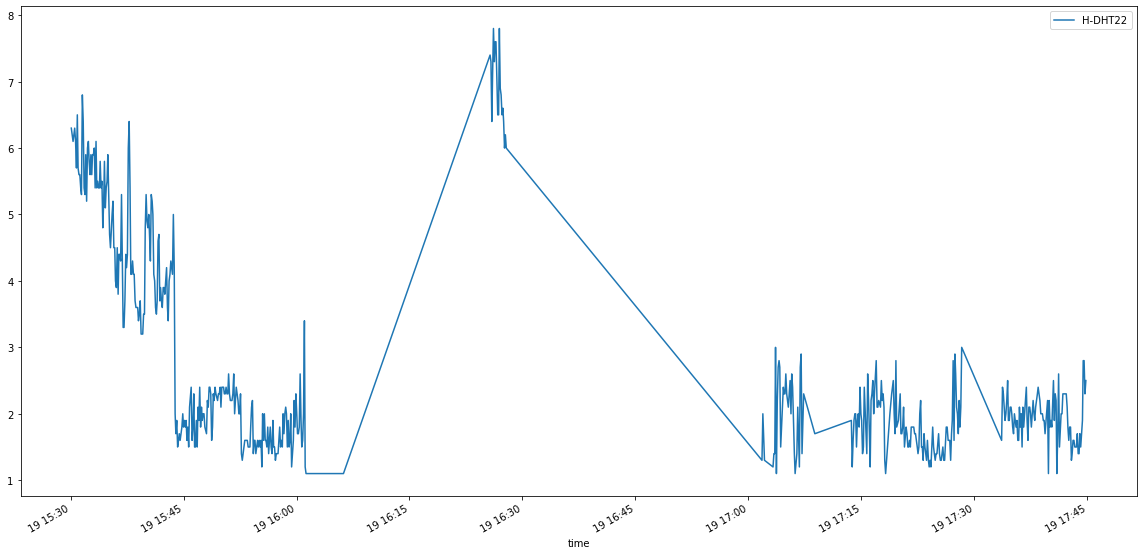

In [8]:
data1 = data1[data1['H-DHT22'].lt(8)]
data1 = data1[data1['H-DHT22'].ne(1)]
data= data1.join(data2.set_index('time'), on='time', how='inner', sort=True )
data.plot.line(x = 'time',y=['H-DHT22'],figsize=(20,10))

We can view graphically that holes in data are common for H and T data. But, data that are registred is correct.
In H-DHT11-measures Jupiterbook are analized the holes of data.


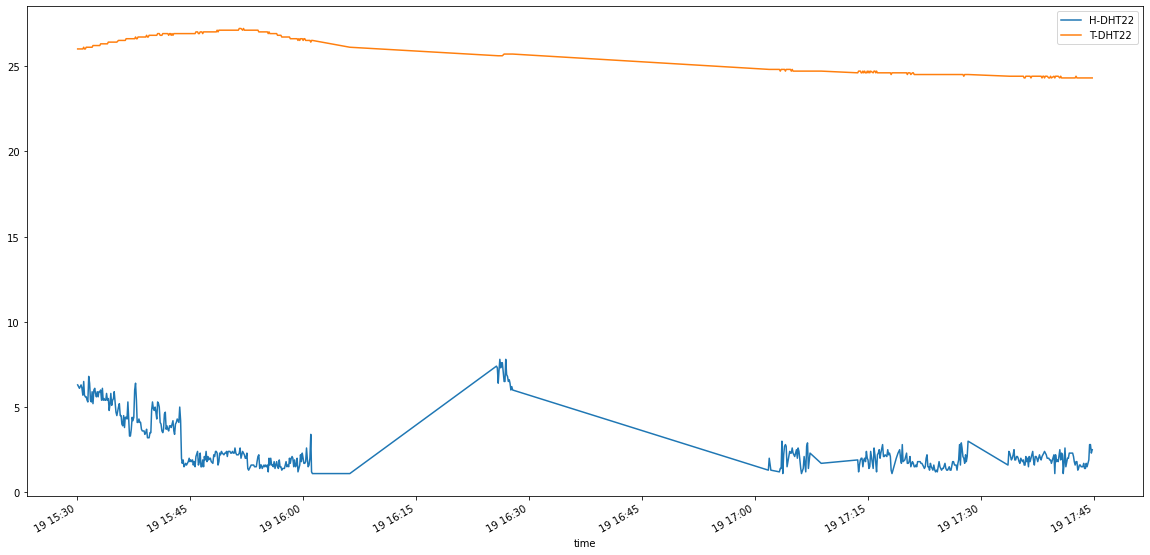

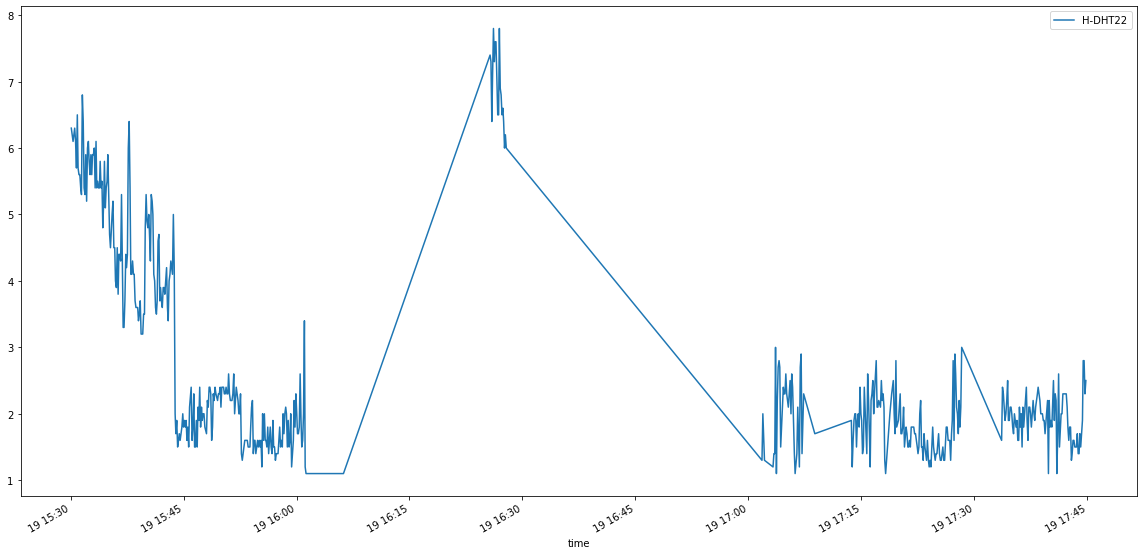

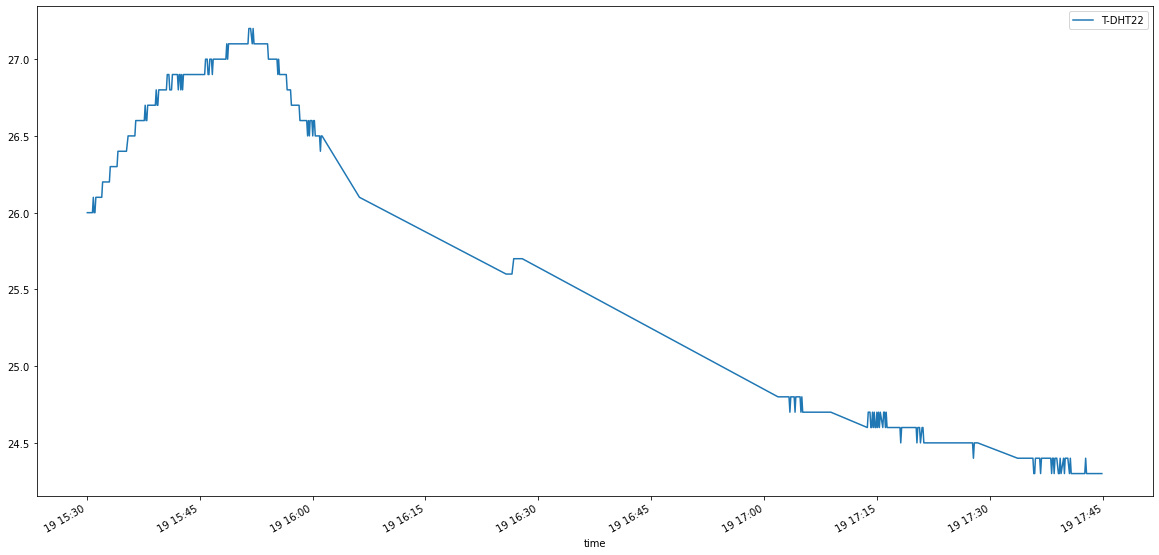

In [9]:
data.describe()
data.plot.line(x = 'time',figsize=(20,10))
data.plot.line(x = 'time',y=['H-DHT22'],figsize=(20,10))
data.plot.line(x = 'time',y=['T-DHT22'],figsize=(20,10))

Finally, we save data combined to further use

In [10]:
saveJson("DHT22-measures.json", data)